In [15]:
! pip install kaggle
! mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [16]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [17]:
! kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset


kaggle-cat-vs-dog-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [21]:
! unzip kaggle-cat-vs-dog-dataset.zip

Archive:  kaggle-cat-vs-dog-dataset.zip
replace kagglecatsanddogs_3367a/MSR-LA - 3467.docx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [22]:
import cv2
import matplotlib.pyplot as plt

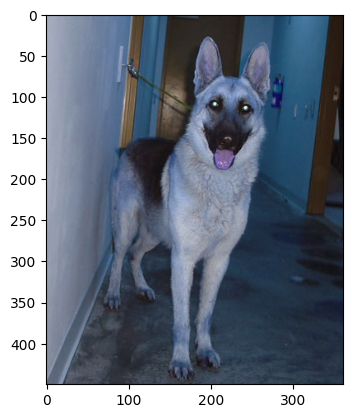

In [23]:
directory_path = "/content/kagglecatsanddogs_3367a/PetImages"
#view a single image
img = cv2.imread(directory_path + '/Dog/9286.jpg')
plt.imshow(img)

In [26]:
import os
import cv2

images = []
labels = []
size = (40, 40)

# Replace these paths with the paths within your Google Colab environment
cat_folder = '/content/kagglecatsanddogs_3367a/PetImages/Cat/'
dog_folder = '/content/kagglecatsanddogs_3367a/PetImages/Dog/'

# Helper function to extract image and label data
def getData(folder, label):
    file_names = os.listdir(folder)

    for file_name in file_names:
        path = os.path.join(folder, file_name)
        # Read image data
        img = cv2.imread(path)
        if img is not None:
            # Resize image to save space
            img = cv2.resize(img, dsize=size)
            images.append(img)
            labels.append(label)

getData(cat_folder, 0)
getData(dog_folder, 1)


In [27]:
len(images), len(labels)

(24913, 24913)

In [30]:
from sklearn.model_selection import train_test_split
train_feature, test_feature, train_label, test_label = \
    train_test_split(images, labels, test_size=0.2)
len(train_feature), len(train_label)

(19930, 19930)

In [32]:
import numpy as np
train_feature = np.array(train_feature)
test_feature = np.array(test_feature)
train_label = np.array(train_label)
test_label = np.array(test_label)
test_feature.shape, test_label.shape

((4983, 40, 40, 3), (4983,))

In [33]:
train_feature_vector = train_feature.reshape(len(train_feature), 40, 40, 3).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature), 40, 40, 3).astype('float32')
train_feature_vector.shape, test_feature_vector.shape

((19930, 40, 40, 3), (4983, 40, 40, 3))

In [34]:
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

In [37]:
from keras.utils import to_categorical
num_classes = len(np.unique(train_label))

train_label_onehot = to_categorical(train_label, num_classes=num_classes)
test_label_onehot = to_categorical(test_label, num_classes=num_classes)

print(train_label_onehot[:5])

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [40]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = Sequential()
model.add(Conv2D(filters=10, kernel_size=(5, 5), padding='same', \
                 input_shape=(40, 40, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=20, kernel_size=(5, 5), padding='same', \
                 input_shape=(40, 40, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 10)        760       
                                                                 
 max_pooling2d (MaxPooling2  (None, 20, 20, 10)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 20, 20, 10)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 20)        5020      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 20)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 20)       

In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_feature_normalize, train_label_onehot, validation_split=0.2, \
                   epochs=12, batch_size=200, verbose=2)

Epoch 1/12
80/80 - 41s - loss: 0.8337 - accuracy: 0.5167 - val_loss: 0.6915 - val_accuracy: 0.5118 - 41s/epoch - 507ms/step
Epoch 2/12
80/80 - 36s - loss: 0.6648 - accuracy: 0.5972 - val_loss: 0.6511 - val_accuracy: 0.5996 - 36s/epoch - 456ms/step
Epoch 3/12
80/80 - 38s - loss: 0.6223 - accuracy: 0.6525 - val_loss: 0.6969 - val_accuracy: 0.5740 - 38s/epoch - 470ms/step
Epoch 4/12
80/80 - 36s - loss: 0.5978 - accuracy: 0.6730 - val_loss: 0.6374 - val_accuracy: 0.6254 - 36s/epoch - 453ms/step
Epoch 5/12
80/80 - 36s - loss: 0.5793 - accuracy: 0.6914 - val_loss: 0.6393 - val_accuracy: 0.6194 - 36s/epoch - 454ms/step
Epoch 6/12
80/80 - 37s - loss: 0.5565 - accuracy: 0.7067 - val_loss: 0.5658 - val_accuracy: 0.6909 - 37s/epoch - 459ms/step
Epoch 7/12
80/80 - 36s - loss: 0.5384 - accuracy: 0.7269 - val_loss: 0.5495 - val_accuracy: 0.7087 - 36s/epoch - 446ms/step
Epoch 8/12
80/80 - 36s - loss: 0.5184 - accuracy: 0.7432 - val_loss: 0.5172 - val_accuracy: 0.7393 - 36s/epoch - 456ms/step
Epoch 9/

In [42]:
scores = model.evaluate(test_feature_normalize, test_label_onehot)
scores

156/156 [==============================] - 6s 42ms/step - loss: 0.5132 - accuracy: 0.7497


[0.5132430791854858, 0.7497491240501404]

In [45]:
prediction = model.predict(test_feature_normalize)
prediction = np.argmax(prediction, axis=1)
prediction[:6]

156/156 [==============================] - 5s 30ms/step


array([1, 0, 1, 0, 1, 0])

In [46]:
test_label[:6]


array([0, 0, 0, 1, 1, 0])

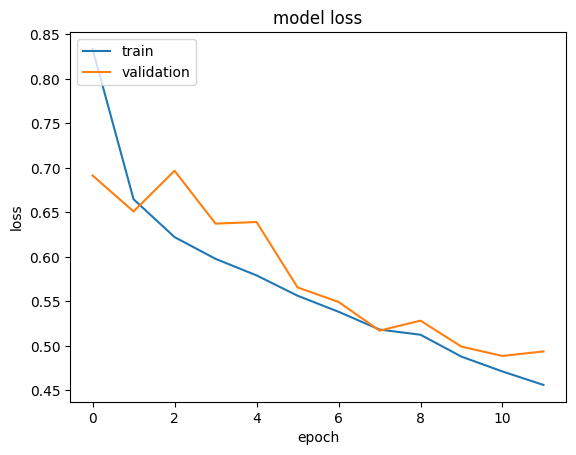

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

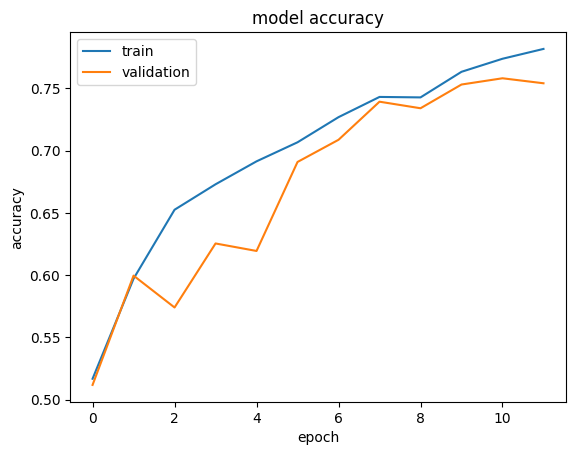

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 91ms/step
Predicted class: Cat


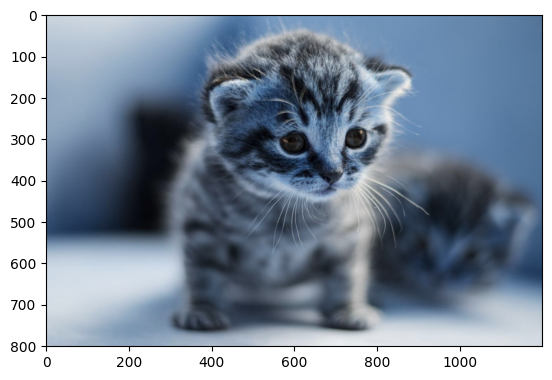

In [53]:
from keras.preprocessing import image

img_path = '/content/cat2.jpg'

img = cv2.imread(img_path)
plt.imshow(img)

img = image.load_img(img_path, target_size=(40, 40))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

predictions = model.predict(img_array)
predicted_class_numbers = np.argmax(predictions, axis=1)


class_names = {0: 'Dog', 1: 'Cat'}


predicted_class_names = [class_names.get(class_number, 'Unknown') for class_number in predicted_class_numbers]

for class_name in predicted_class_names:
    print("Predicted class:", class_name)